<a href="https://colab.research.google.com/github/Krylze/Data-Behavior-Patterns/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
# 1. Carga del Conjunto de Datos
url = '/content/drive/MyDrive/Colab Notebooks/Patrones de Comportamiento de Datos/Unidad 2: Proceso de Descubrimiento del Conocimiento en Datos (KDD)/creditcard.csv'  # Cambia esto a la ruta donde descargaste el archivo
data = pd.read_csv(url)

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

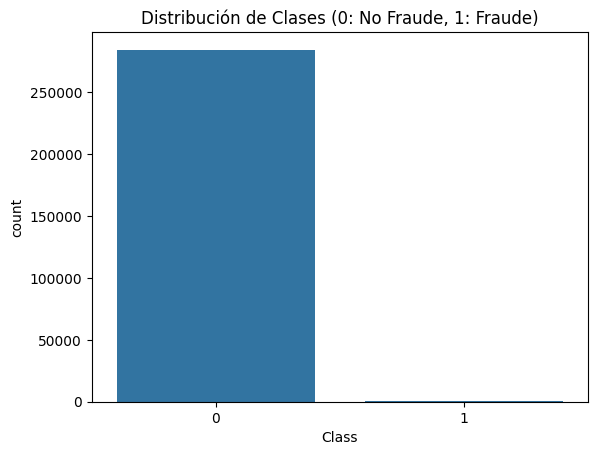

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Distribución de Clases (0: No Fraude, 1: Fraude)')
plt.show()

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

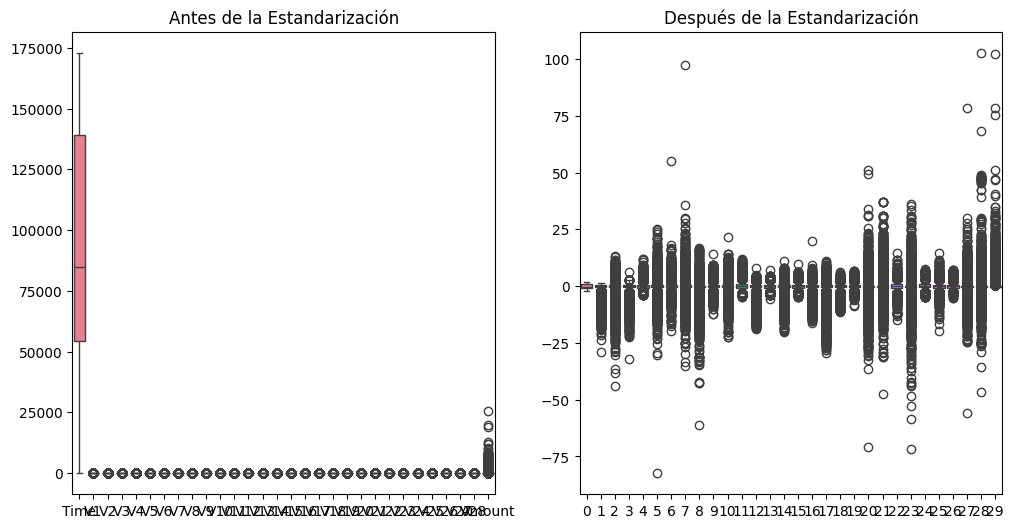

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Antes de la Estandarización')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title('Después de la Estandarización')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC: {roc_auc:.2f}')

NameError: name 'y_pred' is not defined

In [ ]:
def predict_fraud(transaction):
    transaction_scaled = scaler.transform([transaction])
    prediction = model.predict(transaction_scaled)
    return 'Fraude' if prediction[0] == 1 else 'No Fraude'
    # Ejemplo de uso:
nueva_transaccion = [0.0] * X.shape[1]  # Reemplaza con datos reales
resultado = predict_fraud(nueva_transaccion)
print(f'Resultado de la predicción: {resultado}')

In [ ]:
fraud_predictions = data[data['Class'] == 1]
fraud_predictions['Predicted'] = model.predict(X_scaled[data['Class'] == 1])

plt.figure(figsize=(10,6))
sns.scatterplot(x=fraud_predictions['V1'], y=fraud_predictions['V2'], hue=fraud_predictions['Predicted'])
plt.title('Transacciones Fraudulentas Predichas')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

print(fraud_predictions[['Time', 'Amount', 'Predicted']])